In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv('Fuel Cosumption - Sheet1.csv')
dfc = df.copy()
dfc.drop(columns=['Year'], inplace=True)
df.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [114]:
df.isnull().sum()

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64

In [115]:
df.drop(columns='Year', inplace=True)

In [116]:
df.describe()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.000000,639.000000,639.000000,639.000000
mean,3.265728,5.805947,14.713615,296.809077
std,1.231012,1.625588,3.307044,65.504178
min,1.000000,3.000000,4.900000,104.000000
25%,2.200000,4.000000,12.500000,253.000000
50%,3.000000,6.000000,14.400000,288.000000
75%,4.300000,6.000000,16.600000,343.000000
max,8.000000,12.000000,30.200000,582.000000


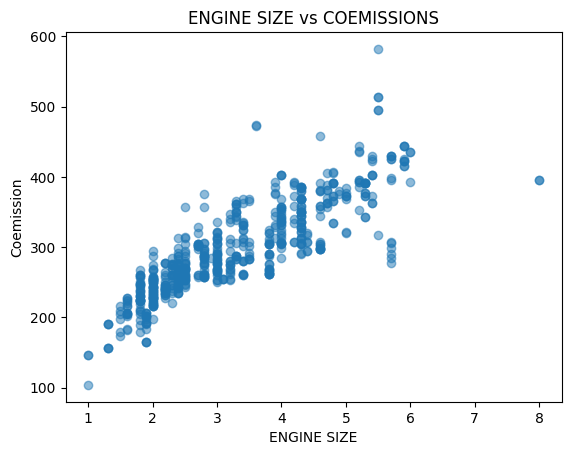

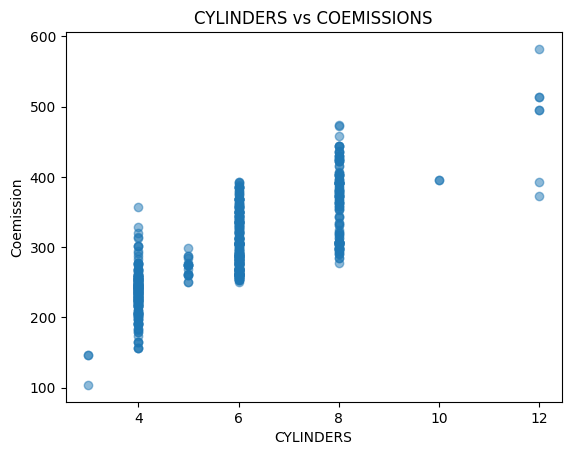

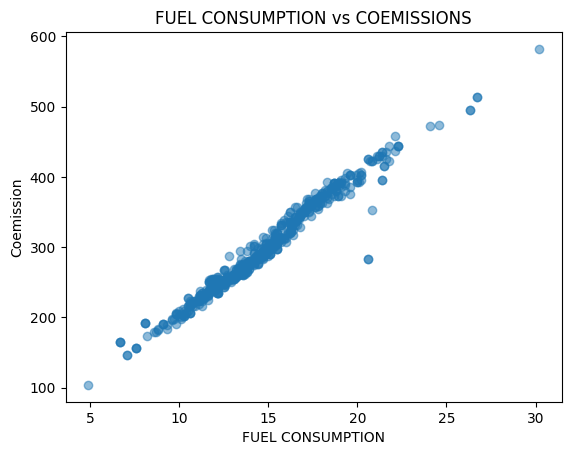

In [117]:
num_col = ['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION']
for col in num_col:
    plt.scatter(df[col], df['COEMISSIONS'], alpha=0.5)
    plt.title(f'{col} vs COEMISSIONS')
    plt.xlabel(f'{col}')
    plt.ylabel('Coemission')
    plt.show()

In [118]:
for i in df.columns:
    print(f'{i} \n {df[i].unique()}')

MAKE 
 ['ACURA' 'AUDI' 'BMW' 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DAEWOO'
 'DODGE' 'FERRARI' 'FORD' 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI' 'ISUZU'
 'JAGUAR' 'JEEP' 'KIA' 'LAND ROVER' 'LEXUS' 'LINCOLN' 'MAZDA'
 'MERCEDES-BENZ' 'NISSAN' 'OLDSMOBILE' 'PLYMOUTH' 'PONTIAC' 'PORSCHE'
 'SAAB' 'SATURN' 'SUBARU' 'SUZUKI' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO']
MODEL 
 ['1.6EL' '3.2TL' '3.5RL' 'INTEGRA' 'INTEGRA GSR/TYPE R' 'NSX' 'A4'
 'A4 QUATTRO' 'A6' 'A6 AVANT QUATTRO' 'A6 QUATTRO' 'A8 QUATTRO'
 'S4 QUATTRO' 'TT COUPE QUATTRO' 'TT COUPE QUATTRO (SUPERCHARGED)'
 'TT ROADSTER' 'TT ROADSTER QUATTRO (SUPERCHARGED)' '323 CONVERTIBLE'
 '323Ci' '323i' '328Ci' '328i' '528i' '528i TOURING' '540i' '540i TOURING'
 '740i' '740iL' '750iL' 'M COUPE' 'M ROADSTER' 'M5' 'X5' 'Z3' 'Z8'
 'CENTURY' 'LESABRE' 'PARK AVENUE' 'PARK AVENUE #' 'REGAL' 'REGAL #'
 'CATERA' 'DEVILLE' 'ELDORADO' 'ESCALADE 4X4' 'SEVILLE' 'ASTRO AWD CARGO'
 'ASTRO AWD PASSENGER' 'ASTRO CARGO' 'ASTRO PASSENGER' 'BLAZER'
 'BLAZER 4X4' 'C1500 SILVERA

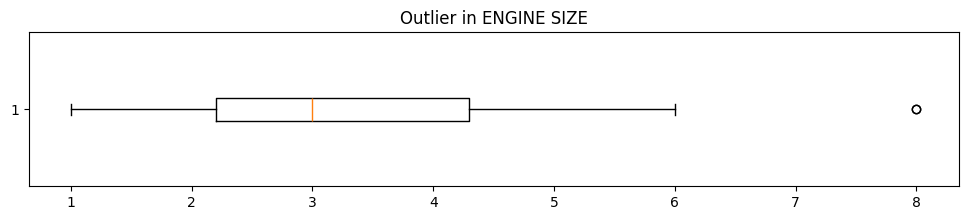

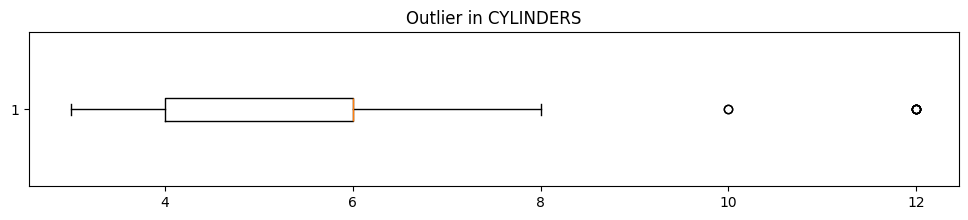

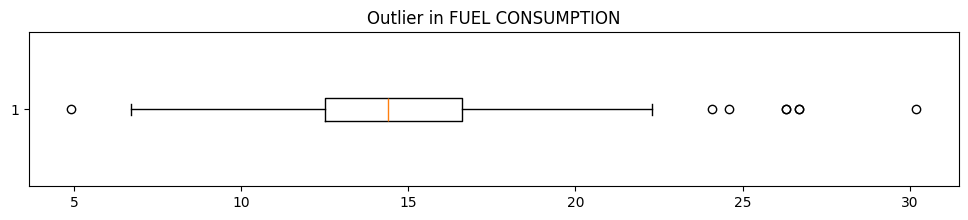

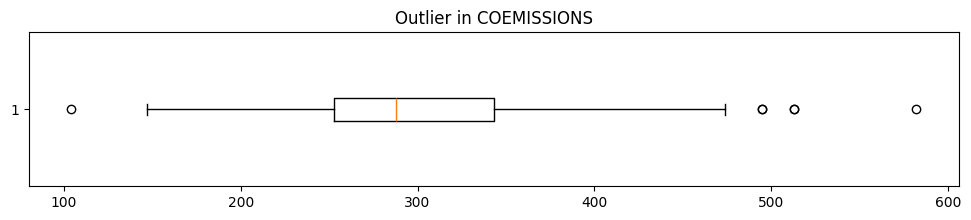

In [119]:
for col in num_col:
    plt.figure(figsize=(12,2))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Outlier in {col}')
    plt.show()

plt.figure(figsize=(12,2))
plt.boxplot(df['COEMISSIONS'], vert=False)
plt.title('Outlier in COEMISSIONS')
plt.show()

<Axes: >

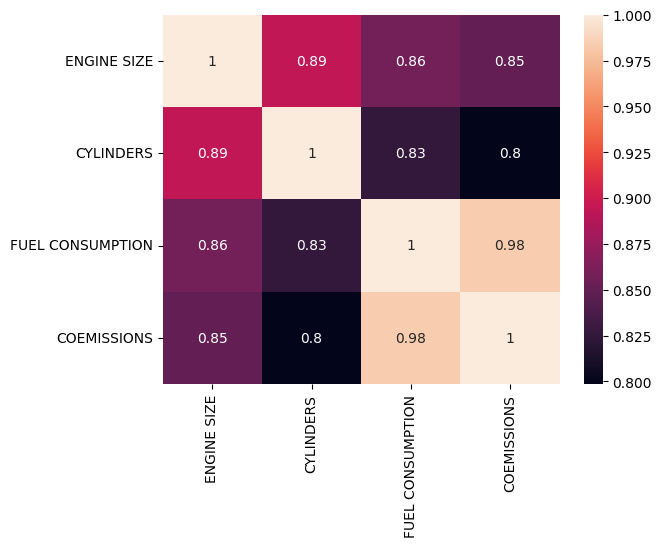

In [120]:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, annot=True)

In [121]:
def linear(x, y):
    x = np.array(x).flatten()
    y = np.array(y).flatten()
    x_mean = x.mean()
    y_mean = y.mean()
    m = sum((x-x_mean)*(y-y_mean))/sum((x-x_mean)**2)
    c = y_mean - (m * x_mean)
    return m,c

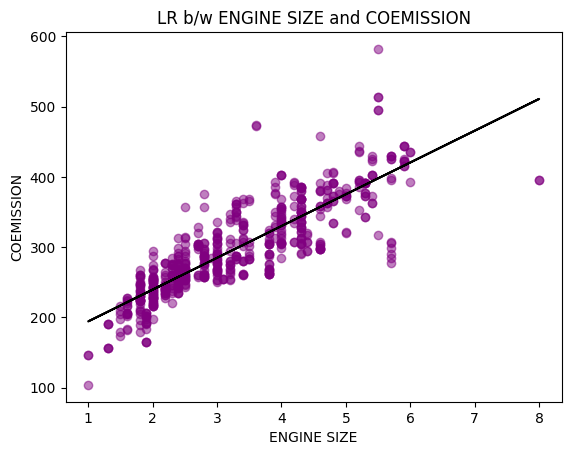

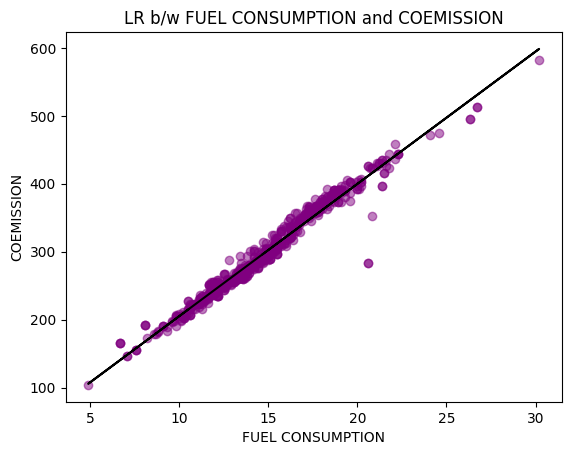

In [122]:
for col in num_col:
    if ( col == 'CYLINDERS' ):
        continue
    slope, intercept = linear(df[col], df['COEMISSIONS'])
    plt.Figure(figsize=(12,6))
    plt.title(f'LR b/w {col} and COEMISSION')
    plt.xlabel(f'{col}')
    plt.ylabel('COEMISSION')
    plt.plot(df[col], slope*df[col]+intercept, color='black')
    plt.scatter(df[col], df['COEMISSIONS'], color='purple', alpha=0.5)
    plt.show()

In [123]:
def multi(features, target):
    X = df[features].values
    y = df[target].values.reshape(-1, 1)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    print("Intercept (c):", theta[0][0])
    for name, value in zip(features, theta[1:].flatten()): 
        print(f"Slope for {name}: {value:.4f}")
    y_pred = X_b.dot(theta)
    plt.Figure(figsize=(12,6))
    plt.title('Multiple Linear Regression')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.scatter(df['COEMISSIONS'], y_pred, color='black', alpha=0.5)
    plt.show()
    

Intercept (c): 16.382048534316795
Slope for ENGINE SIZE: 4.7098
Slope for CYLINDERS: -3.7850
Slope for FUEL CONSUMPTION: 19.5072


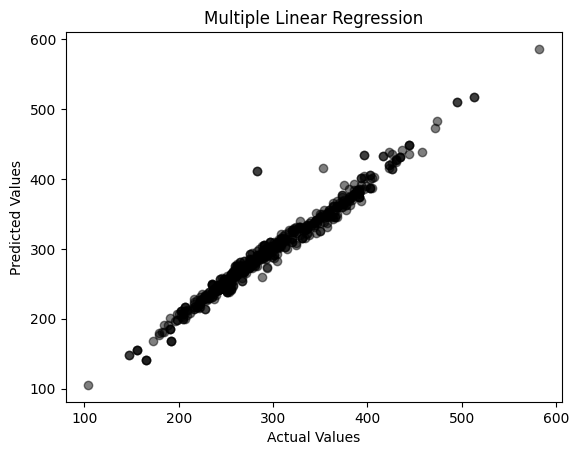

In [124]:
features = ['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION']
target = ['COEMISSIONS']

multi(features, target)


In [125]:
df = pd.get_dummies(df, columns=['MAKE','VEHICLE CLASS','TRANSMISSION','FUEL'], dtype=int)
df

,MODEL,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS,MAKE_ACURA,MAKE_AUDI,MAKE_BMW,MAKE_BUICK,MAKE_CADILLAC,...,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_M5,TRANSMISSION_M6,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z
0,1.6EL,1.6,4,10.5,216,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.6EL,1.6,4,9.8,205,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3.2TL,3.2,6,13.7,265,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,3.5RL,3.5,6,15.0,301,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,INTEGRA,1.8,4,11.4,230,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,V70 AWD TURBO,2.4,5,14.4,288,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
635,V70 GLT TURBO,2.4,5,13.6,274,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
636,V70 T5 TURBO,2.3,5,13.9,274,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
637,V70 T5 TURBO,2.3,5,13.0,260,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [126]:
df.sample(10)

,MODEL,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS,MAKE_ACURA,MAKE_AUDI,MAKE_BMW,MAKE_BUICK,MAKE_CADILLAC,...,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_M5,TRANSMISSION_M6,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z
597,JETTA,1.8,4,11.1,225,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
385,LX 470,4.7,8,19.4,405,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
40,328i,2.8,6,13.0,258,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
496,9-5 WAGON TURBO,2.3,4,13.9,276,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
268,RANGER 4X4,4.0,6,17.3,357,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
543,AVALON,3.0,6,12.7,251,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
420,CLK 430 CABRIOLET,4.3,8,15.2,304,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
611,PASSAT,1.8,4,11.2,225,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
456,ALERO,2.4,4,12.5,244,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
567,SIENNA,3.0,6,14.3,288,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [127]:
df.columns

Index(['MODEL', 'ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS',
       'MAKE_ACURA', 'MAKE_AUDI', 'MAKE_BMW', 'MAKE_BUICK', 'MAKE_CADILLAC',
       'MAKE_CHEVROLET', 'MAKE_CHRYSLER', 'MAKE_DAEWOO', 'MAKE_DODGE',
       'MAKE_FERRARI', 'MAKE_FORD', 'MAKE_GMC', 'MAKE_HONDA', 'MAKE_HYUNDAI',
       'MAKE_INFINITI', 'MAKE_ISUZU', 'MAKE_JAGUAR', 'MAKE_JEEP', 'MAKE_KIA',
       'MAKE_LAND ROVER', 'MAKE_LEXUS', 'MAKE_LINCOLN', 'MAKE_MAZDA',
       'MAKE_MERCEDES-BENZ', 'MAKE_NISSAN', 'MAKE_OLDSMOBILE', 'MAKE_PLYMOUTH',
       'MAKE_PONTIAC', 'MAKE_PORSCHE', 'MAKE_SAAB', 'MAKE_SATURN',
       'MAKE_SUBARU', 'MAKE_SUZUKI', 'MAKE_TOYOTA', 'MAKE_VOLKSWAGEN',
       'MAKE_VOLVO', 'VEHICLE CLASS_COMPACT', 'VEHICLE CLASS_FULL-SIZE',
       'VEHICLE CLASS_MID-SIZE', 'VEHICLE CLASS_MINICOMPACT',
       'VEHICLE CLASS_MINIVAN', 'VEHICLE CLASS_PICKUP TRUCK - SMALL',
       'VEHICLE CLASS_PICKUP TRUCK - STANDARD',
       'VEHICLE CLASS_STATION WAGON - MID-SIZE',
       'VEHICLE CLASS_STATI

Intercept (c): -5.057704611901101e+16
Slope for CYLINDERS: 2130.3376
Slope for FUEL CONSUMPTION: -19630.7712
Slope for COEMISSIONS: 983.1942
Slope for MAKE_ACURA: 42117264864195696.0000
Slope for MAKE_AUDI: 42117264864216816.0000
Slope for MAKE_BMW: 42117264864203632.0000
Slope for MAKE_BUICK: 42117264864206496.0000
Slope for MAKE_CADILLAC: 42117264864204912.0000
Slope for MAKE_CHEVROLET: 42117264864203304.0000
Slope for MAKE_CHRYSLER: 42117264864205728.0000
Slope for MAKE_DAEWOO: 42117264864201392.0000
Slope for MAKE_DODGE: 42117264864213184.0000
Slope for MAKE_FERRARI: 42117264864212696.0000
Slope for MAKE_FORD: 42117264864208288.0000
Slope for MAKE_GMC: 42117264864197752.0000
Slope for MAKE_HONDA: 42117264864199184.0000
Slope for MAKE_HYUNDAI: 42117264864210104.0000
Slope for MAKE_INFINITI: 42117264864201312.0000
Slope for MAKE_ISUZU: 42117264864209168.0000
Slope for MAKE_JAGUAR: 42117264864184488.0000
Slope for MAKE_JEEP: 42117264864202816.0000
Slope for MAKE_KIA: 42117264864193832

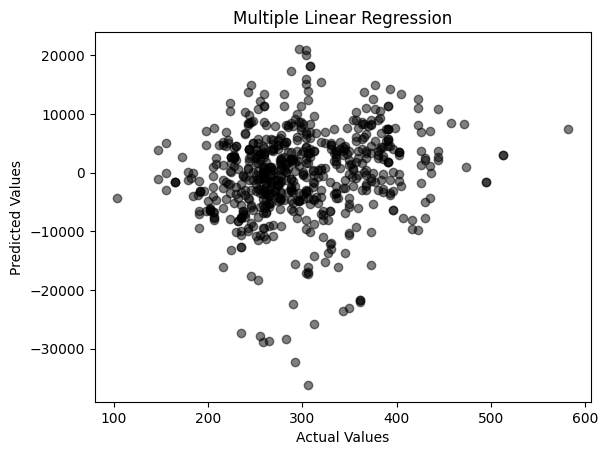

In [128]:
features = ['CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS','MAKE_ACURA', 'MAKE_AUDI', 'MAKE_BMW', 'MAKE_BUICK', 'MAKE_CADILLAC','MAKE_CHEVROLET', 'MAKE_CHRYSLER', 'MAKE_DAEWOO', 'MAKE_DODGE','MAKE_FERRARI', 'MAKE_FORD', 'MAKE_GMC', 'MAKE_HONDA', 'MAKE_HYUNDAI','MAKE_INFINITI', 'MAKE_ISUZU', 'MAKE_JAGUAR', 'MAKE_JEEP', 'MAKE_KIA','MAKE_LAND ROVER', 'MAKE_LEXUS', 'MAKE_LINCOLN', 'MAKE_MAZDA','MAKE_MERCEDES-BENZ', 'MAKE_NISSAN', 'MAKE_OLDSMOBILE', 'MAKE_PLYMOUTH','MAKE_PONTIAC', 'MAKE_PORSCHE', 'MAKE_SAAB', 'MAKE_SATURN','MAKE_SUBARU', 'MAKE_SUZUKI', 'MAKE_TOYOTA', 'MAKE_VOLKSWAGEN','MAKE_VOLVO', 'VEHICLE CLASS_COMPACT', 'VEHICLE CLASS_FULL-SIZE','VEHICLE CLASS_MID-SIZE', 'VEHICLE CLASS_MINICOMPACT','VEHICLE CLASS_MINIVAN', 'VEHICLE CLASS_PICKUP TRUCK - SMALL','VEHICLE CLASS_PICKUP TRUCK - STANDARD','VEHICLE CLASS_STATION WAGON - MID-SIZE','VEHICLE CLASS_STATION WAGON - SMALL', 'VEHICLE CLASS_SUBCOMPACT','VEHICLE CLASS_SUV', 'VEHICLE CLASS_TWO-SEATER','VEHICLE CLASS_VAN - CARGO', 'VEHICLE CLASS_VAN - PASSENGER','TRANSMISSION_A3', 'TRANSMISSION_A4', 'TRANSMISSION_A5','TRANSMISSION_AS4', 'TRANSMISSION_AS5', 'TRANSMISSION_AS6','TRANSMISSION_M5', 'TRANSMISSION_M6', 'FUEL_D', 'FUEL_E', 'FUEL_N','FUEL_X', 'FUEL_Z']

target = ['COEMISSIONS']

multi(features, target)

In [129]:
x = dfc.drop(columns='COEMISSIONS')
y = dfc['COEMISSIONS']

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False),
     x.select_dtypes(include=['object']).columns),
    ('scaler', StandardScaler(),
     x.select_dtypes(include=['number']).columns)
], remainder='passthrough')

x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

ValueError: Found unknown categories ['550 MARANELLO', 'V70 AWD TURBO', 'K1500 TAHOE 4X4', 'CENTURY', '456 MGT', 'S 500', '3.2TL', 'MUSTANG #', 'SEBRING', 'A8 QUATTRO', 'E 430', 'S70 AWD TURBO', 'REGAL #', 'VIPER RT/10', 'TT ROADSTER QUATTRO (SUPERCHARGED)', 'XKR CONVERTIBLE #', 'S-TYPE V6', 'E 430 4MATIC', 'SEVILLE', 'S 430', 'ML 320', 'GS 300', 'S-TYPE V8', 'V70 GLT TURBO', 'ASTRO AWD PASSENGER', 'TT ROADSTER', 'S2000', '740iL', 'BLAZER 4X4', 'VENTURE', 'PARK AVENUE #', 'EXPLORER', 'ESCALADE 4X4', 'SL 600', 'ELANTRA', 'INTEGRA GSR/TYPE R'] in column 1 during transform